<img src="https://freepngimg.com/download/logo/92929-nasdaqnflx-icons-netflix-computer-line-red.png" style="display:block; margin:auto;">

# Netflix 1990s Movie Analysis Project
This project explores the Netflix catalog to uncover trends and insights about movies and series released in the 1990s. Using real Netflix data, we perform exploratory data analysis to understand the characteristics of 90s entertainment, including genre distribution, movie durations, and the prevalence of different types of content.

**Dataset Overview:**
- **Source:** `netflix_data.csv`
- **Rows:** Each row represents a unique movie or series available on Netflix.
- **Key Columns:**
    - `show_id`: Unique identifier for each title
    - `type`: Movie or TV Show
    - `title`: Name of the show or movie
    - `director`, `cast`, `country`: Production details
    - `date_added`: When the title was added to Netflix
    - `release_year`: Year the title was released
    - `duration`: Length of the movie or show
    - `genre`: Genre classification
    - `description`: Brief summary of the content

**Project Goals:**
- Focus on movies and series released between 1990 and 1999.
- Analyze trends in genres, durations, and types of content from the 90s.
- Provide visual and statistical summaries to highlight what made 90s entertainment unique on Netflix.

This analysis will help a production company specializing in nostalgic styles to better understand the landscape of 1990s media and inform future creative decisions.

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [2]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [3]:
netflix_df.iloc[:,1:].describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [4]:
df_90s = netflix_df.loc[(netflix_df['release_year']>= 1990) & (netflix_df['release_year']<=1999), ['title','release_year', 'duration', 'type', 'genre']]

df_90s.head(10)

,title,release_year,duration,type,genre
6,187,1997,119,Movie,Dramas
118,A Dangerous Woman,1993,101,Movie,Dramas
145,A Night at the Roxbury,1998,82,Movie,Comedies
167,A Thin Line Between Love & Hate,1996,108,Movie,Comedies
194,Aashik Awara,1993,154,Movie,Dramas
240,Agneepath,1990,174,Movie,Dramas
315,American Beauty,1999,122,Movie,Dramas
320,American History X,1998,119,Movie,Dramas
333,An American Tail: Fievel Goes West,1991,75,Movie,Children
334,An American Tail: The Mystery of the Night Mon...,1999,75,Movie,Children


In [5]:
df_90s.describe()

,release_year,duration
count,184.000000,184.000000
mean,1995.130435,114.500000
std,2.944727,34.163221
min,1990.000000,1.000000
25%,1993.000000,94.000000
50%,1996.000000,108.000000
75%,1998.000000,136.000000
max,1999.000000,195.000000


In [6]:
duration = df_90s['duration'].mode()[0]
duration

np.int64(94)

In [7]:
short_df = df_90s.loc[(df_90s['duration']<=90)]
short_df.tail()

,title,release_year,duration,type,genre
3943,The End of Evangelion,1997,87,Movie,Action
4124,The Mad Monk,1993,85,Movie,Comedies
4252,The Rugrats Movie,1998,81,Movie,Children
4347,The Waterboy,1998,90,Movie,Comedies
4411,Tim Allen: Men Are Pigs,1990,30,Movie,Stand-Up


In [8]:
short_movie_count = short_df[(short_df['type']=='Movie')&(short_df['genre'] == 'Action')].shape[0]
short_movie_count

7

C:\Users\mpune\AppData\Local\Temp\ipykernel_19220\3188972207.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


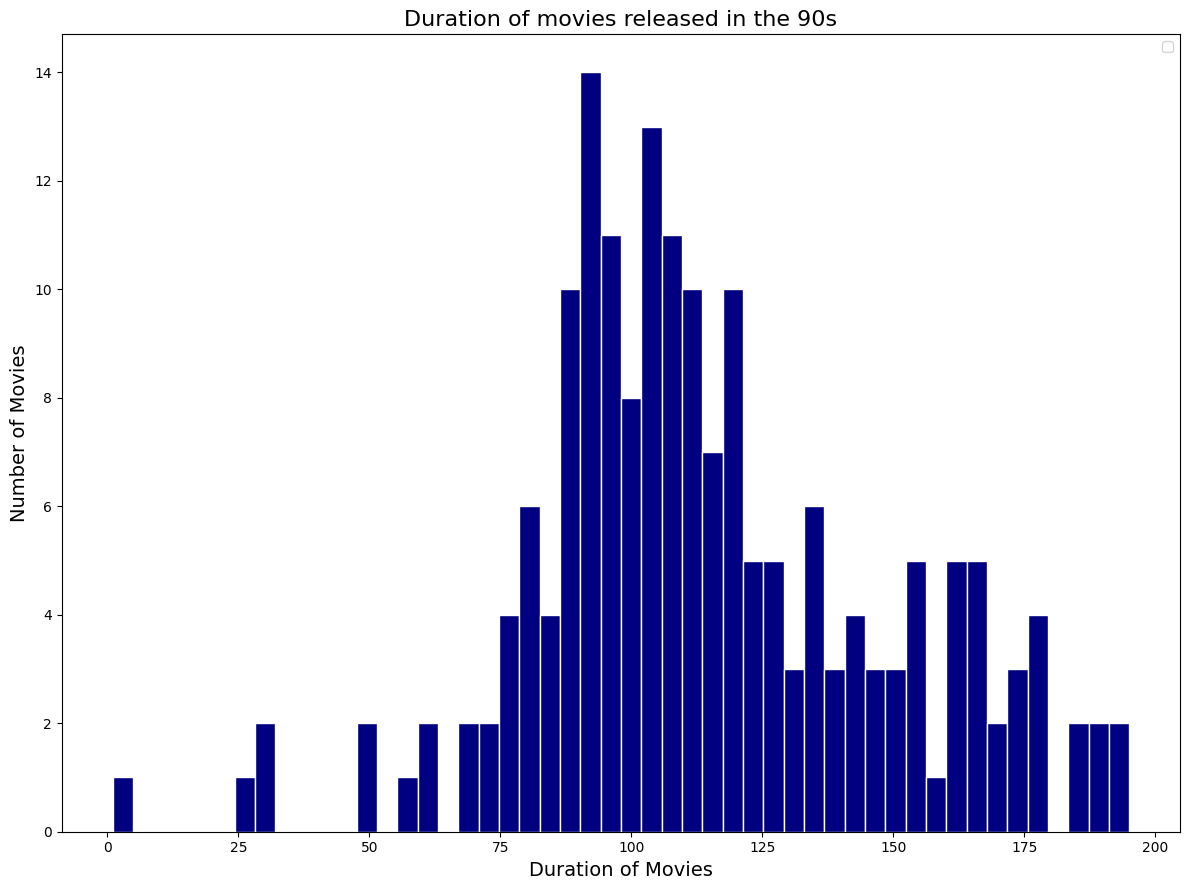

In [9]:
# Look at the duration of movies in the 90s as a hist plot
plt.figure(figsize=(12,9))
plt.hist(df_90s['duration'], bins=50, color='navy', edgecolor='white')
plt.xlabel('Duration of Movies', fontsize=14)
plt.ylabel('Number of Movies', fontsize = 14)
plt.title("Duration of movies released in the 90s", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

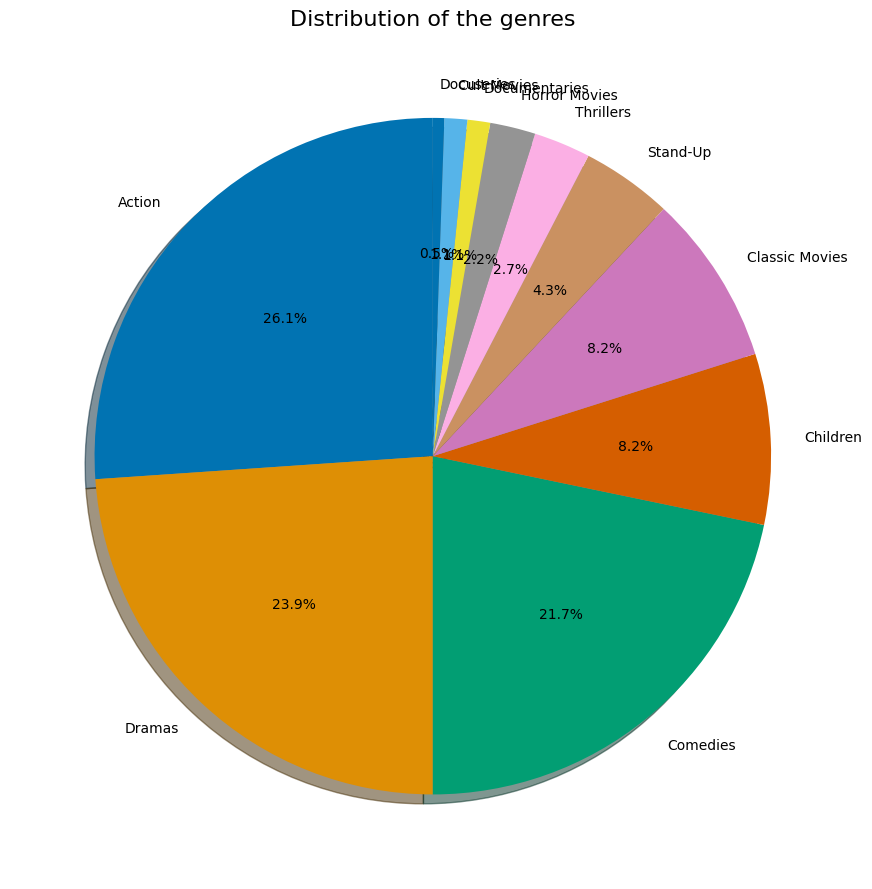

In [10]:
# Genre distribution in the 90s
colors = sns.color_palette('colorblind')
genre_count = df_90s['genre'].value_counts()
plt.figure(figsize=(12,9))
plt.pie(genre_count.values,labels=genre_count.index, autopct="%1.1f%%", startangle=90,shadow=True, colors=colors)
plt.title("Distribution of the genres", fontsize=16)
plt.tight_layout()
plt.show()

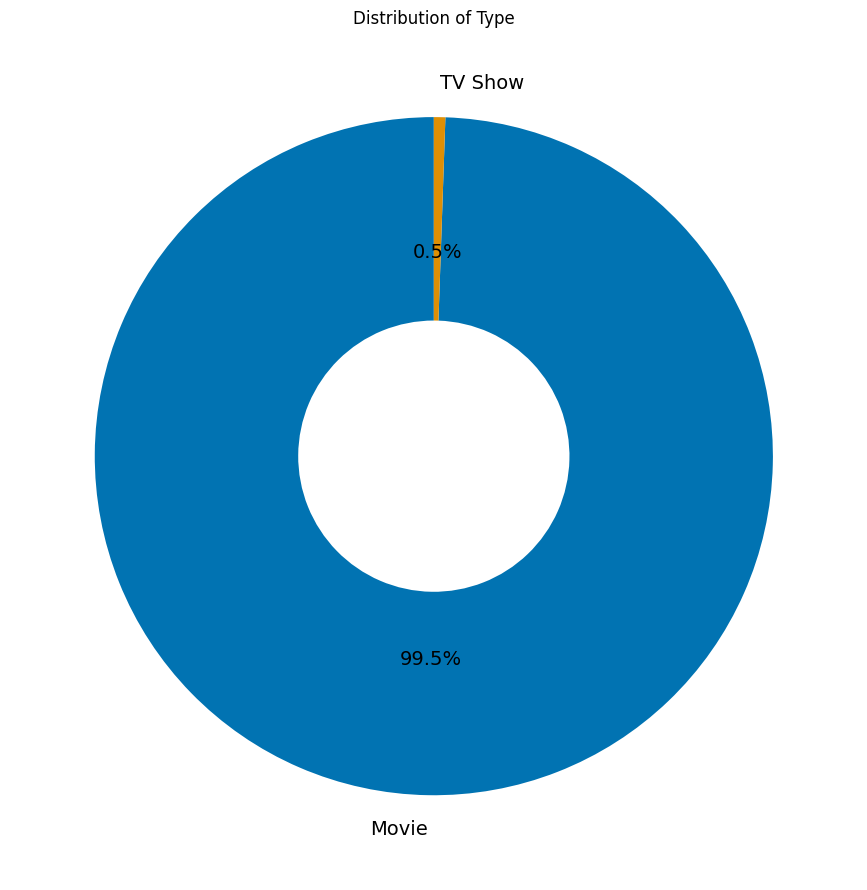

In [11]:
type_count = df_90s['type'].value_counts()
plt.figure(figsize=(12,9))
plt.pie(
    type_count.values,
    labels=type_count.index,
    autopct="%1.1f%%",    # show percentages
    startangle=90,        # start from top
    colors=colors,
    wedgeprops={'width':0.6}, 
    textprops={'fontsize':14}
)

plt.title("Distribution of Type")
plt.tight_layout()
plt.show()


In [15]:
from IPython.display import display, HTML

# Example stats (replace with your actual computed values)
total_media = len(netflix_df)
nineties_media = len(df_90s)
most_freq_duration = netflix_df["duration"].mode()[0]
short_movies = len(short_df)
top_genres = netflix_df["genre"].value_counts().head(3).index.tolist()

# Create HTML box
html_box = f"""
<div style="
    border: 2px solid #4CAF50;
    border-radius: 10px;
    padding: 15px;
    background-color: #f9f9f9;
    font-family: Arial, sans-serif;
    width: 75%;
    margin: 20px auto;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.1);
">
  <h3 style="color:#4CAF50; text-align:center;">📊 Netflix Data Summary</h3>
  <ul style="line-height:1.8; font-size:16px;">
    <li><b>Total media on Netflix:</b> {total_media}</li>
    <li><b>Media released in the 90s:</b> {nineties_media}</li>
    <li><b>Most frequent movie duration:</b> {most_freq_duration}</li>
    <li><b>Number of short movies:</b> {short_movies}</li>
    <li><b>Top 3 genres:</b> {", ".join(top_genres)}</li>
  </ul>
</div>
"""

display(HTML(html_box))
